In [1]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import sys

In [58]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
matplotlib.rc('pdf', fonttype=42)

In [2]:
visitnum = ['FirstVisit/', 'LaterVisit/']

for visit in visitnum[-1:]:
    direc1 = os.path.join(r"../dataFolders/PaperPipelineOutput/FilteredTracks_v2/", visit)
    direc2 = os.path.join(r"../dataFolders/PaperPipelineOutput/RadiusAndAngle_v2/", visit)
    files1 = glob.glob(direc1 + 'c*.csv')
    files2 = glob.glob(direc2 + 'c*.csv')

outpathfig = os.path.join(r"../dataFolders/PaperPipelineOutput/Figures/v2/radialDistanceOverTime/", visit)

In [3]:
trajectory = pd.read_csv(files2[0])
trajectory.head()

,x_centered,y_centered,radial_distance_normalized,angle
0,-211.286962,-2.022963,2.855360,7.546547
1,-194.495344,0.365375,2.628320,8.427820
2,-181.990256,2.261506,2.459518,9.415801
3,-173.071306,3.645187,2.339320,9.706789
4,-167.038100,4.496178,2.258089,8.174898


In [55]:
# half_width = 3.42
full_width = 4.49
height = full_width

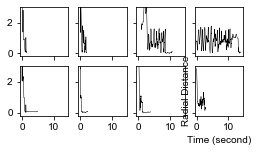

In [59]:
# draw colored sweeps
f1, ax = plt.subplots(2,4, figsize = (4,2), sharex = True, sharey = True)
ax = ax.ravel()

names_first = ['c-1_m17', 'c-2_m23', 'c-3_m10', 'c-10_m11']
names_last = ['c-1_m14', 'c-2_m12', 'c-3_m10', 'c-10_m11']
names = [names_first, names_last]

visitnum = ['FirstVisit/', 'LaterVisit/']

ii = 0
for visit, names in zip(visitnum, names):
#     direc1 = os.path.join(r"../dataFolders/PaperPipelineOutput/FilteredTracks_v2/", visit)
    direc2 = os.path.join(r"../dataFolders/PaperPipelineOutput/RadiusAndAngle_v2/", visit)
#     files1 = glob.glob(direc1 + 'c*.csv')
    files2 = glob.glob(direc2 + 'c*.csv')

    for name in names:
        data = [f for f in files2 if name in f][0]
        trajectory = pd.read_csv(data)

        r = trajectory.radial_distance_normalized.values
        ax[ii].plot(np.arange(len(r))*1/100, r, color = 'k',
                   linewidth = 0.5)
#         ax[ii].legend()
        ii+=1
    plt.xlabel('Time (second)')
    plt.ylabel('Radial Distance')
    plt.ylim(-0.2, 3)
    plt.savefig('../dataFolders/PaperPipelineOutput/Figures/v2/sweeps_forTalk.svg')

In [30]:
trajectory.head()

,x_centered,y_centered,radial_distance_normalized,angle
0,-308.492698,36.799064,4.142397,8.547231
1,-298.527306,37.102620,4.010988,10.303627
2,-291.068573,37.778996,3.913468,14.066831
3,-285.755112,38.596572,3.844666,17.600982
4,-282.225535,39.323732,3.799359,19.290548


In [ ]:
# draw colored radius

names_first = ['c-1_m17', 'c-2_m23', 'c-3_m10', 'c-10_m11']
names_last = ['c-1_m14', 'c-2_m12', 'c-3_m10', 'c-10_m11']

f1, ax = plt.subplots(1,4, figsize = (15,4), sharex = True, sharey = True)
ax = ax.ravel()

ii = 0
for name in names:
    data = [f for f in files if name in f][0]
    trajectory = pd.read_csv(data)
    ax[ii].plot(np.arange(len(trajectory.r))*1/100, trajectory.r, label = name)
    ax[ii].legend()
    ii+=1

plt.ylim(-0.2, 4)
plt.savefig('../dataFolders/PaperPipelineOutput/Figures/v2/sweeps_forTalk.png')
